In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [2]:
#importing datasets  
data_set= pd.read_csv('data_car_cross.csv') 

In [3]:
data_set.head()

,Unnamed: 0,mpg,cylinder,displacement,horse power,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values 

In [14]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [6]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [13]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [16]:
y_pred

array([150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
       150.])

In [10]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [11]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

C:\Users\SASI REKHA\AppData\Local\Temp\ipykernel_19844\3824702796.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


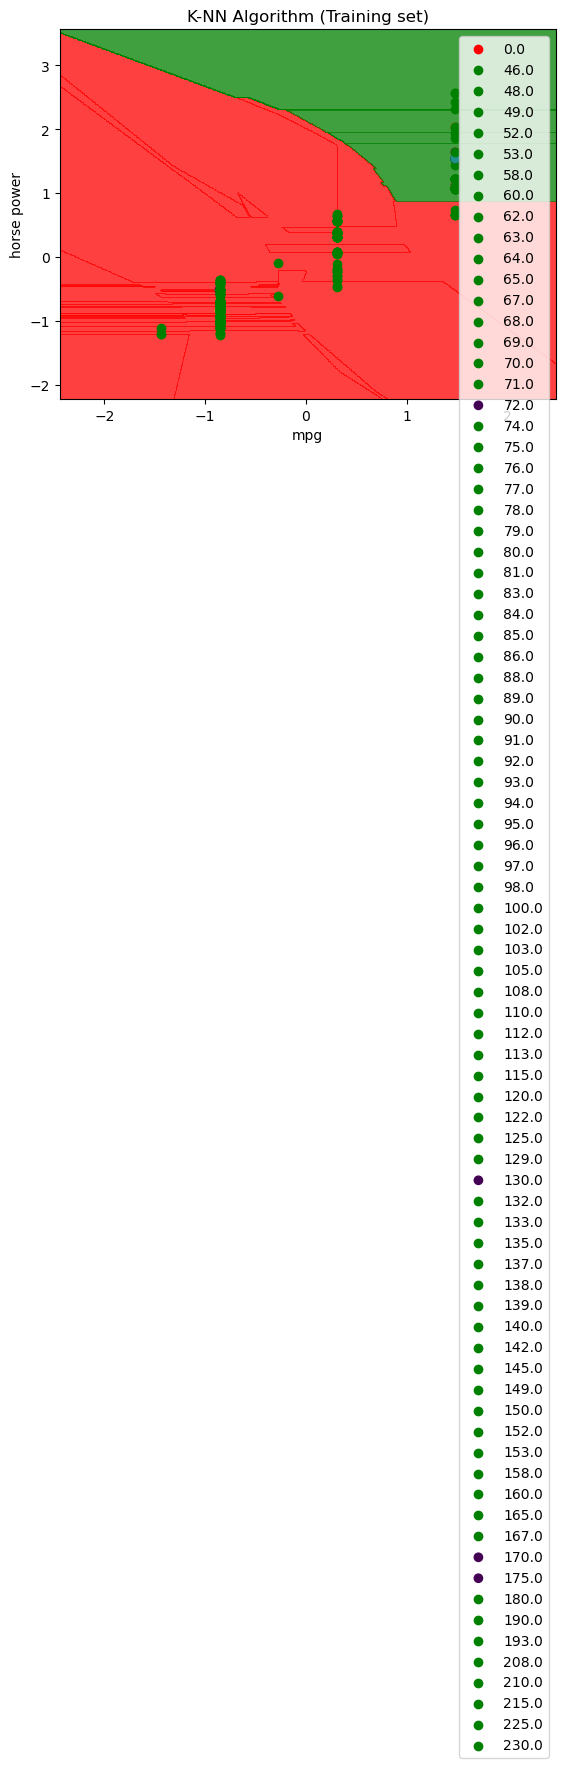

In [12]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('mpg')  
mtp.ylabel('horse power')  
mtp.legend()  
mtp.show() 